In [101]:
# ทดสอบการทำ Reluarization สำหรับ Linear Regression ดังนี้
# เรียกใช้ library สำหรับทำงานประกอบด้วย numpy pandas seaborn เเละ matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# ทดลองสร้างชุดข้อมูลเรียนรู้

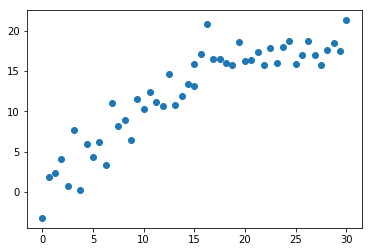

In [103]:
sample = 25
rng = np.random.RandomState(1) # สร้าง object สำหรับการสุ่มข้อมูลโดยกำหนดให้ชื่อ rng
x_train = np.linspace(0, 15, sample)
y_train = x_train - 2* rng.randn(sample)
new_sam = np.linspace(max(x_train),max(x_train)+15, sample)
x_train = np.concatenate((x_train,new_sam))
add_y_train = np.exp(2*rng.rand(sample))
add_y_train += max(y_train)
y_train=np.concatenate((y_train,add_y_train))
plt.scatter(x_train, y_train)

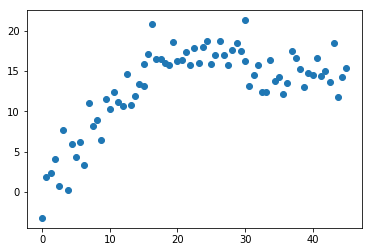

In [104]:
new_sam = np.linspace(max(x_train),max(x_train)+15, sample)
x_train=np.concatenate((x_train,new_sam))
add_y_train = 0.7*max(y_train) - 2* rng.randn(sample)
y_train=np.concatenate((y_train,add_y_train))
plt.scatter(x_train, y_train)

In [105]:
# สร้าง Linear regression model โดยกำหนดให้ hypothesis เขียนได้โดย

# h(x)=θ0+θ1x

In [106]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train[:, np.newaxis], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
# ทดลองเเสดงค่า intercept ( θ0 ) เเละ coefficient ( θ1 ) เมื่อ

# h(x)=θ0+θ1x

In [108]:
print("Model intercept:", model.intercept_)
print("Model coefficient:", model.coef_)

('Model intercept:', 7.507555018324067)
('Model coefficient:', array([0.25145264]))


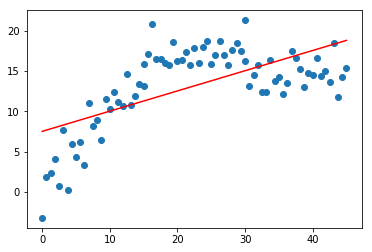

In [109]:
# ทดลองเเสดงกราฟของ linear model
xfit = np.linspace(0, max(x_train), 2*sample)
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x_train, y_train)
plt.plot(xfit, yfit,color='red');

In [110]:
# สร้าง polynomial regression model โดยกำหนดให้เป็นสมการ order = 6
# polynomial regression model
# h(x)=θ0+θ1x1+θ2x2+θ3x3+⋯+θ6x6

In [111]:
from sklearn.preprocessing import PolynomialFeatures
# กำหนดให้สร้างแบบจำลองโดยใช้ polynomial function degree 6
poly = PolynomialFeatures(degree=6) 
x_train_poly = poly.fit_transform(x_train[:, None])
pm = LinearRegression()
pm.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [112]:
# ทดลองเเสดงค่าพารามิเตอร์ ( θ0 ) ถึง ( θ6 )
print("Model intercept:", pm.intercept_)
print("Model coefficient:    ", pm.coef_)

('Model intercept:', -0.8033757481436812)
('Model coefficient:    ', array([ 0.00000000e+00,  1.79933385e+00, -1.69844060e-01,  1.67487649e-02,
       -8.23557851e-04,  1.77284968e-05, -1.37586595e-07]))


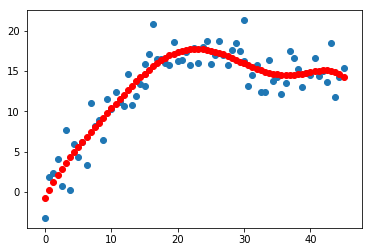

In [113]:
# ทดลองเเสดงกราฟของ nth order polynomial regression model
yfit = pm.predict(x_train_poly)
plt.scatter(x_train, y_train)
plt.scatter(x_train, yfit,color='red');

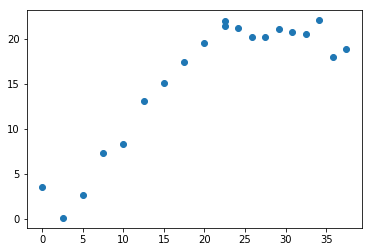

In [114]:
# ทดลองสร้างชุดข้อมูลทดสอบ
sample_test = 10
x_test = np.linspace(0, max(x_train/2), sample_test)
y_test = x_test - 2.3* rng.randn(sample_test)

new_sam_test = np.linspace(max(x_test),max(x_test)+15, sample_test)
x_test=np.concatenate((x_test,new_sam_test))
add_y_test = y_test[-1] - 1.5* rng.randn(sample_test)
y_test=np.concatenate((y_test,add_y_test))
plt.scatter(x_test, y_test)


In [115]:
#ทดสอบประสิทธิภาพของ linear regression model เเละ high order regression model

In [116]:
from sklearn.metrics import mean_squared_error
import math
# Linear Model

y_linear_pred = model.predict(x_test[:, np.newaxis])
print(mean_squared_error(y_linear_pred, y_test)) 

# polynomial model
x_test_poly = poly.fit_transform(x_test[:, None])
y_poly_pred = pm.predict(x_test_poly)
print(mean_squared_error(y_poly_pred, y_test)) 

31.968086524989985
13.765253056568687


In [117]:
# Regularization

# ทดลองปรับปรุงแบบจำลองด้วยวิธี Regularization

In [118]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=100)
reg.fit(x_train_poly, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [119]:
# ทดลองเเสดงค่าพารามิเตอร์ ( θ0 ) ถึง ( θ6 )
# intercept 
print(reg.intercept_) # theta0
# coefficient
print(reg.coef_) # theta1 theta2 theta3

1.4903053281344665
[ 0.00000000e+00  1.12965490e-01  1.44381418e-01 -7.83182318e-03
  1.05930946e-04  8.92974427e-07 -2.04341971e-08]


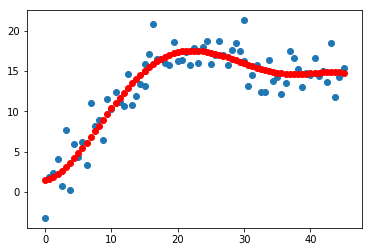

In [120]:
# ทดลองเเสดงกราฟของ regularized polynomial regression model
yfit_reg = reg.predict(x_train_poly)
plt.scatter(x_train, y_train)
plt.scatter(x_train, yfit_reg,color='red');

Text(0.5,1,'Regularized Polynomial Regression')

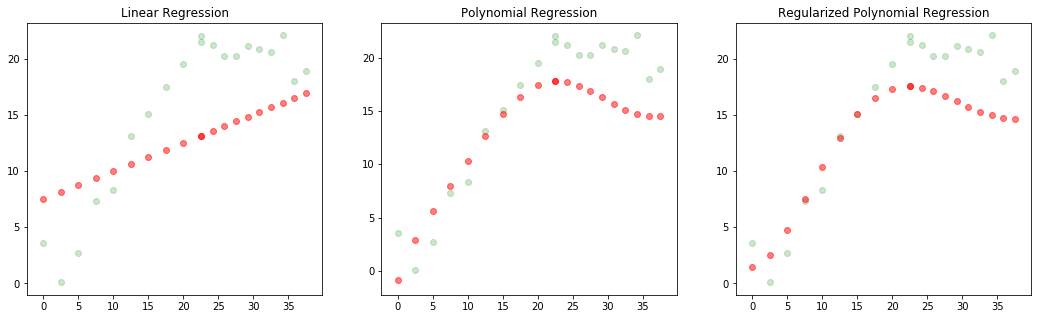

In [121]:
# ทดลองเเสดงกราฟเปรียบเทียบแบบจำลองระหว่าง linear regression, polynomial regression 
# เเละ regularized polynomial regression
fig = plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(x_test, y_test, color = 'green', alpha=.2)
plt.scatter(x_test, model.predict(x_test[:, np.newaxis]), color = 'red', alpha=.5)
plt.title('Linear Regression')

plt.subplot(1, 3, 2)
plt.scatter(x_test, y_test, color = 'green', alpha=.2)
plt.scatter(x_test, pm.predict(x_test_poly), color = 'red', alpha=.5)
plt.title('Polynomial Regression')

plt.subplot(1, 3, 3)
plt.scatter(x_test, y_test, color = 'green', alpha=.2)
plt.scatter(x_test, reg.predict(x_test_poly), color = 'red', alpha=.5)
plt.title('Regularized Polynomial Regression')

In [122]:
# ทดสอบประสิทธิภาพของ regularized polynomial regression model
# Linear Model
print(mean_squared_error(y_linear_pred, y_test)) 

# polynomial model
print(mean_squared_error(y_poly_pred, y_test)) 

# regularized polynomial model
x_test_poly = poly.fit_transform(x_test[:, None])
y_reg_pred = reg.predict(x_test_poly)
print(mean_squared_error(y_reg_pred, y_test)) 

31.968086524989985
13.765253056568687
12.698301901816185


In [123]:
 # Regularized logistic regression
 from sklearn.datasets import make_blobs
 from scipy import optimize

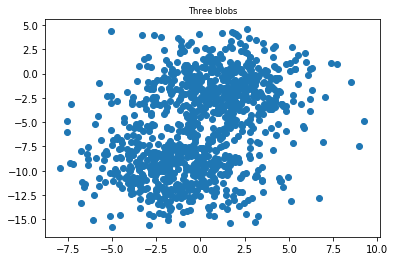

In [124]:
  plt.title("Three blobs", fontsize='small')
  (X,y) = make_blobs(n_samples=1000, n_features=2, centers=2,random_state=2, cluster_std=2.5)
  plt.scatter(X[:, 0], X[:, 1], marker='o');

In [125]:
 colors=np.array(["#000000", "#929591"])
 plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)
 for label, c in enumerate(colors):
 plt.scatter([], [], c=c, label=str(label))
 plt.legend();

IndentationError: expected an indented block (<ipython-input-125-bda42d5861c9>, line 4)

In [126]:
 import pandas as pd

In [127]:
 data = pd.DataFrame({'X0': X[:, 0],'X1': X[:, 1],'Y': y})
 data

,X0,X1,Y
0,1.606105,-5.178423,1
1,-1.226950,-7.204182,0
2,-0.244843,-12.038946,0
3,0.005917,-0.720965,1
4,3.817871,-1.587949,1
5,-1.922914,-9.823921,0
6,0.814979,0.222595,1
7,-1.366815,-7.740991,0
8,2.459873,-1.715702,1
9,1.934867,-1.550848,1


Text(0,0.5,'X1')

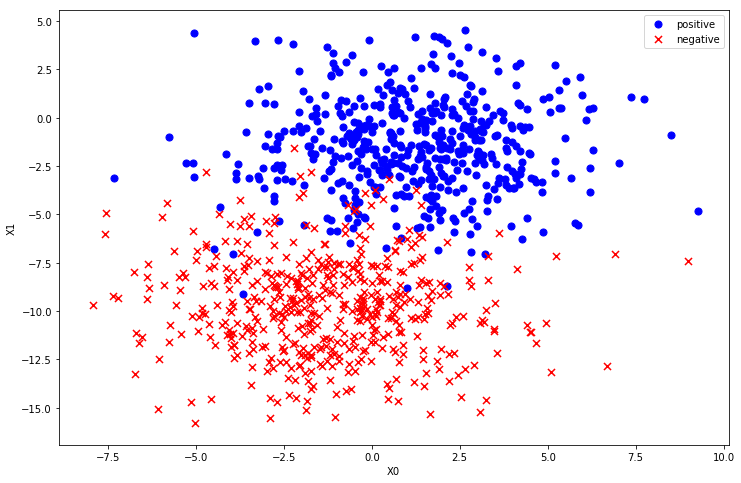

In [128]:
 positive = data[data['Y'].isin([1])]
 negative = data[data['Y'].isin([0])]
 fig, ax = plt.subplots(figsize=(12,8))
 ax.scatter(positive['X0'], positive['X1'], s=50, c='b', marker='o', label='positive')
 ax.scatter(negative['X0'], negative['X1'], s=50, c='r', marker='x', label='negative')
 ax.legend()
 ax.set_xlabel('X0')
 ax.set_ylabel('X1')


In [129]:
 X = data.drop(columns=['Y'])
 y = data['Y']
 test_size=.2
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

NameError: name 'train_test_split' is not defined

In [130]:
 from sklearn.datasets import load_iris
 from sklearn.linear_model import LogisticRegression
 X, y = load_iris(return_X_y=True)
 test_size=.2
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

NameError: name 'train_test_split' is not defined

In [131]:
# สร้างตัวอย่างชุดข้อมูลสำหรับฝึกฝนและทดสอบ
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

In [132]:
# General a toy dataset:s it's just a straight line with some Gaussian noise:
xmin, xmax = -5, 5
n_samples = 1000000
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(float)
X[X > 0] *= 4
X += 0.3 * np.random.normal(size=n_samples)

X = X[:, np.newaxis]
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

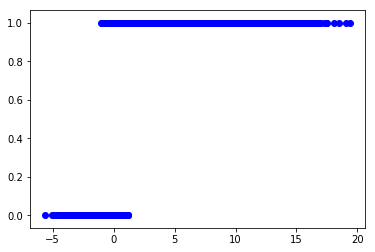

In [133]:
# ทดลองแสดงข้อมูล
plt.figure()
plt.scatter(X.ravel(), y, color="blue", zorder=20)
X_test = np.linspace(-5, 10, 300)

In [134]:
 from sklearn.preprocessing import StandardScaler
 from sklearn.preprocessing import LabelEncoder
 from sklearn.preprocessing import Imputer
 from sklearn.impute import SimpleImputer 
 imr = SimpleImputer(missing_values=np.nan, strategy='mean')

#Import Breast Cancer Wisconsin dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header = None)

 X = df.loc[:, 1:10] #features vectors
 y = df.loc[:, 10]   #class labels: 2 = benign, 4 = malignant

 le = LabelEncoder() #positive class = 1 (benign), negative class = 0 (malignant)
 y = le.fit_transform(y)

 #Replace missing feature values with mean feature value
 X = X.replace('?', np.nan)
 imr = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
 imr = imr.fit(X)
 X_imputed = imr.transform(X.values)

 #Split data into training (70%) and testing (30%) sets
 X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size = 0.3, random_state = 1)

 #Z-score normalization
 sc = StandardScaler()
 X_train = sc.fit_transform(X_train)
 X_test = sc.transform(X_test)

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [135]:
# ทดสอบประสิทธิภาพของแบบจำลองโดยการปรับค่า  λ
Lambda_acc = []
Lambda = []
for i in range(1, 101, 1):
  mplo = LogisticRegression(C = i/100, penalty='l2')
  mplo.fit(X_train, y_train) 
  Lambda_acc.append(mplo.score(X_train, y_train))
  Lambda.append(1/(i/100))


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: C <= 0

In [136]:
# แสดงผลการทดสอบโดยพล็อตกราฟเทียบระหว่างความถูกต้องและ  λ
import plotly.express as px
fig = px.line(x=Lambda ,y=Lambda_acc)
fig.update_layout(
    title="Regularized logistic regression",
    xaxis_title="$\lambda$",
    yaxis_title="Accuracy",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="black"
    )
)
fig.show()

ImportError: No module named plotly.express

In [143]:
# ทดลองเเสดงค่า intercept คือ  θ0 ,  θ1  และ  θ2
 mplo = LogisticRegression(C=1e6) 
 mplo = LogisticRegression(penalty='l2')
 mplo.fit(X_train, y_train)

IndentationError: unexpected indent (<ipython-input-143-ffd6290d6051>, line 2)

In [146]:
# intercept 
print('intercept = {mplo.intercept_}') # theta0
# coefficient
print('coefficient = {mplo.coef_}') # theta1 theta2 theta3

AttributeError: 'LogisticRegression' object has no attribute 'intercept_'

In [149]:
# ทดลองดูเหมาะสมกับข้อมูลของแบบจำลองที่สร้างขึ้นเมื่อเทียบกับข้อมูลโดยใช้ค่า  R2
R_squred_train =mplo.score(X_train, y_train) # accuracy of the model
print('R_squared_error_training = {R_squred_train}') 

NotFittedError: This LogisticRegression instance is not fitted yet

In [150]:
mplo = LogisticRegression(C = 1e6, penalty='l2')
mplo.fit(X_train, y_train)
print(f'R_squared_error_training = {mplo.score(X_train, y_train)}') 

regmplo = LogisticRegression(C = 0.01, penalty='l2')
regmplo.fit(X_train, y_train)
print(f'R_squared_error_training = {regmplo.score(X_train, y_train)}') 

SyntaxError: invalid syntax (<ipython-input-150-5b8c002ba6c4>, line 3)

In [151]:
# K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [152]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(mplo , X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda2\lib\threading.py", line 801, in __bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda2\lib\threading.py", line 754, in run
    self.__target(*self.__args, **self.__kwargs)
  File "C:\ProgramData\Anaconda2\lib\site-packages\sklearn\externals\joblib\externals\loky\backend\queues.py", line 175, in _feed
    onerror(e, obj)
  File "C:\ProgramData\Anaconda2\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py", line 310, in _on_queue_feeder_error
    self.thread_wakeup.wakeup()
  File "C:\ProgramData\Anaconda2\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py", line 153, in wakeup
    self._writer.send_bytes(b"0")
IOError: [Errno 6] The handle is invalid



JoblibValueError: JoblibValueError
___________________________________________________________________________
...........................................................................
C:\ProgramData\Anaconda2\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    169     pkg_name = mod_name.rpartition('.')[0]
    170     main_globals = sys.modules["__main__"].__dict__
    171     if alter_argv:
    172         sys.argv[0] = fname
    173     return _run_code(code, main_globals, None,
--> 174                      "__main__", fname, loader, pkg_name)
        fname = r'C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py'
        loader = <pkgutil.ImpLoader instance>
        pkg_name = ''
    175 
    176 def run_module(mod_name, init_globals=None,
    177                run_name=None, alter_sys=False):
    178     """Execute a module's code without importing it

...........................................................................
C:\ProgramData\Anaconda2\lib\runpy.py in _run_code(code=<code object <module> at 0000000002678D30, file ...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from 'C:\ProgramDa...onda2\lib\site-packages\ipykernel\kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}, init_globals=None, mod_name='__main__', mod_fname=r'C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py', mod_loader=<pkgutil.ImpLoader instance>, pkg_name='')
     67         run_globals.update(init_globals)
     68     run_globals.update(__name__ = mod_name,
     69                        __file__ = mod_fname,
     70                        __loader__ = mod_loader,
     71                        __package__ = pkg_name)
---> 72     exec code in run_globals
        code = <code object <module> at 0000000002678D30, file ...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__builtins__': <module '__builtin__' (built-in)>, '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py', '__loader__': <pkgutil.ImpLoader instance>, '__name__': '__main__', '__package__': '', 'app': <module 'ipykernel.kernelapp' from 'C:\ProgramDa...onda2\lib\site-packages\ipykernel\kernelapp.pyc'>, 'sys': <module 'sys' (built-in)>}
     73     return run_globals
     74 
     75 def _run_module_code(code, init_globals=None,
     76                     mod_name=None, mod_fname=None,

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    659 
    660         If a global instance already exists, this reinitializes and starts it
    661         """
    662         app = cls.instance(**kwargs)
    663         app.initialize(argv)
--> 664         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    665 
    666 #-----------------------------------------------------------------------------
    667 # utility functions, for convenience
    668 #-----------------------------------------------------------------------------

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    494         if self.poller is not None:
    495             self.poller.start()
    496         self.kernel.start()
    497         self.io_loop = ioloop.IOLoop.current()
    498         try:
--> 499             self.io_loop.start()
        self.io_loop.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    500         except KeyboardInterrupt:
    501             pass
    502 
    503 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
   1068                 self._events.update(event_pairs)
   1069                 while self._events:
   1070                     fd, events = self._events.popitem()
   1071                     try:
   1072                         fd_obj, handler_func = self._handlers[fd]
-> 1073                         handler_func(fd_obj, events)
        handler_func = <function null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
   1074                     except (OSError, IOError) as e:
   1075                         if errno_from_exception(e) == errno.EPIPE:
   1076                             # Happens when the client closes the connection
   1077                             pass

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    451             return
    452         zmq_events = self.socket.EVENTS
    453         try:
    454             # dispatch events:
    455             if zmq_events & zmq.POLLIN and self.receiving():
--> 456                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    457                 if not self.socket:
    458                     return
    459             if zmq_events & zmq.POLLOUT and self.sending():
    460                 self._handle_send()

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    481             else:
    482                 raise
    483         else:
    484             if self._recv_callback:
    485                 callback = self._recv_callback
--> 486                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    487         
    488 
    489     def _handle_send(self):
    490         """Handle a send event."""

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    433         """Wrap running callbacks in try/except to allow us to
    434         close our socket."""
    435         try:
    436             # Use a NullContext to ensure that all StackContexts are run
    437             # inside our blanket exception handler rather than outside.
--> 438             callback(*args, **kwargs)
        callback = <function null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    439         except:
    440             gen_log.error("Uncaught exception in ZMQStream callback",
    441                           exc_info=True)
    442             # Re-raise the exception so that IOLoop.handle_callback_exception

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    295         # Fast path when there are no active contexts.
    296         def null_wrapper(*args, **kwargs):
    297             try:
    298                 current_state = _state.contexts
    299                 _state.contexts = cap_contexts[0]
--> 300                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    301             finally:
    302                 _state.contexts = current_state
    303         null_wrapper._wrapped = True
    304         return null_wrapper

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"# prepare the cross-validation procedure\ncv =...acy: %.3f (%.3f)' % (mean(scores), std(scores)))", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2022, 10, 17, 14, 47, 8, 453000, tzinfo=tzutc()), u'msg_id': u'921c7f9d-8d87-42de-9389-43da443441a2', u'msg_type': u'execute_request', u'session': u'8cb04425-f31d-4bf9-a6a7-b439dd07ccc8', u'username': u'', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'921c7f9d-8d87-42de-9389-43da443441a2', 'msg_type': u'execute_request', 'parent_header': {}})
    228             self.log.warning("Unknown message type: %r", msg_type)
    229         else:
    230             self.log.debug("%s: %s", msg_type, msg)
    231             self.pre_handler_hook()
    232             try:
--> 233                 handler(stream, idents, msg)
        handler = <bound method IPythonKernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = ['8cb04425-f31d-4bf9-a6a7-b439dd07ccc8']
        msg = {'buffers': [], 'content': {u'allow_stdin': True, u'code': u"# prepare the cross-validation procedure\ncv =...acy: %.3f (%.3f)' % (mean(scores), std(scores)))", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2022, 10, 17, 14, 47, 8, 453000, tzinfo=tzutc()), u'msg_id': u'921c7f9d-8d87-42de-9389-43da443441a2', u'msg_type': u'execute_request', u'session': u'8cb04425-f31d-4bf9-a6a7-b439dd07ccc8', u'username': u'', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'921c7f9d-8d87-42de-9389-43da443441a2', 'msg_type': u'execute_request', 'parent_header': {}}
    234             except Exception:
    235                 self.log.error("Exception in message handler:", exc_info=True)
    236             finally:
    237                 self.post_handler_hook()

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=['8cb04425-f31d-4bf9-a6a7-b439dd07ccc8'], parent={'buffers': [], 'content': {u'allow_stdin': True, u'code': u"# prepare the cross-validation procedure\ncv =...acy: %.3f (%.3f)' % (mean(scores), std(scores)))", u'silent': False, u'stop_on_error': True, u'store_history': True, u'user_expressions': {}}, 'header': {u'date': datetime.datetime(2022, 10, 17, 14, 47, 8, 453000, tzinfo=tzutc()), u'msg_id': u'921c7f9d-8d87-42de-9389-43da443441a2', u'msg_type': u'execute_request', u'session': u'8cb04425-f31d-4bf9-a6a7-b439dd07ccc8', u'username': u'', u'version': u'5.2'}, 'metadata': {}, 'msg_id': u'921c7f9d-8d87-42de-9389-43da443441a2', 'msg_type': u'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code=u"# prepare the cross-validation procedure\ncv =...acy: %.3f (%.3f)' % (mean(scores), std(scores)))", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    203 
    204         self._forward_input(allow_stdin)
    205 
    206         reply_content = {}
    207         try:
--> 208             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = u"# prepare the cross-validation procedure\ncv =...acy: %.3f (%.3f)' % (mean(scores), std(scores)))"
        store_history = True
        silent = False
    209         finally:
    210             self._restore_input()
    211 
    212         if res.error_before_exec is not None:

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=(u"# prepare the cross-validation procedure\ncv =...acy: %.3f (%.3f)' % (mean(scores), std(scores)))",), **kwargs={'silent': False, 'store_history': True})
    532             )
    533         self.payload_manager.write_payload(payload)
    534 
    535     def run_cell(self, *args, **kwargs):
    536         self._last_traceback = None
--> 537         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = (u"# prepare the cross-validation procedure\ncv =...acy: %.3f (%.3f)' % (mean(scores), std(scores)))",)
        kwargs = {'silent': False, 'store_history': True}
    538 
    539     def _showtraceback(self, etype, evalue, stb):
    540         # try to preserve ordering of tracebacks and print statements
    541         sys.stdout.flush()

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell=u"# prepare the cross-validation procedure\ncv =...acy: %.3f (%.3f)' % (mean(scores), std(scores)))", store_history=True, silent=False, shell_futures=True)
   2709                 self.displayhook.exec_result = result
   2710 
   2711                 # Execute the user code
   2712                 interactivity = "none" if silent else self.ast_node_interactivity
   2713                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2714                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler instance>
   2715                 
   2716                 self.last_execution_succeeded = not has_raised
   2717 
   2718                 # Reset this so later displayed values do not modify the

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Print object>], cell_name='<ipython-input-152-1b3bebbd8945>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler instance>, result=<ExecutionResult object at 100b3f28, execution_c..._before_exec=None error_in_exec=None result=None>)
   2813 
   2814         try:
   2815             for i, node in enumerate(to_run_exec):
   2816                 mod = ast.Module([node])
   2817                 code = compiler(mod, cell_name, "exec")
-> 2818                 if self.run_code(code, result):
        self.run_code = <bound method ZMQInteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0000000010F2E930, file "<ipython-input-152-1b3bebbd8945>", line 4>
        result = <ExecutionResult object at 100b3f28, execution_c..._before_exec=None error_in_exec=None result=None>
   2819                     return True
   2820 
   2821             for i, node in enumerate(to_run_interactive):
   2822                 mod = ast.Interactive([node])

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0000000010F2E930, file "<ipython-input-152-1b3bebbd8945>", line 4>, result=<ExecutionResult object at 100b3f28, execution_c..._before_exec=None error_in_exec=None result=None>)
   2873         outflag = 1  # happens in more places, so it's easier as default
   2874         try:
   2875             try:
   2876                 self.hooks.pre_run_code_hook()
   2877                 #rprint('Running code', repr(code_obj)) # dbg
-> 2878                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0000000010F2E930, file "<ipython-input-152-1b3bebbd8945>", line 4>
        self.user_global_ns = {'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', u'sample = 25\nrng = np.random.RandomState(1) # ...ain,add_y_train))\nplt.scatter(x_train, y_train)', u'# \u0e17\u0e14\u0e2a\u0e2d\u0e1a\u0e01\u0e32\u...ort numpy as np\nimport matplotlib.pyplot as plt', u'# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e2a\u0e23\u...\u0e40\u0e23\u0e35\u0e22\u0e19\u0e23\u0e39\u0e49', u'sample = 25\nrng = np.random.RandomState(1) # ...ain,add_y_train))\nplt.scatter(x_train, y_train)', u'new_sam = np.linspace(max(x_train),max(x_train...ain,add_y_train))\nplt.scatter(x_train, y_train)', u'from sklearn.linear_model import LinearRegress...on()\nmodel.fit(x_train[:, np.newaxis], y_train)', u'print("Model intercept:", model.intercept_)\nprint("Model coefficient:    ", model.coef_)', u'print("Model intercept:", model.intercept_)\nprint("Model coefficient:", model.coef_)', u'print("Model intercept:", model.intercept_)\nprint(Model coefficient:, model.coef_)', u'print("Model intercept:", model.intercept_)\nprint("Model coefficient:", model.coef_)', u'print("Model intercept:%f", model.intercept_)\nprint("Model coefficient:%f", model.coef_)', u'print("Model intercept:", model.intercept_)\nprint("Model coefficient:", model.coef_)', u"# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e40\u0e40\u...ain, y_train)\nplt.plot(xfit, yfit,color='red');", u'# \u0e2a\u0e23\u0e49\u0e32\u0e07 polynomial re...0+\u03b81x1+\u03b82x2+\u03b83x3+\u22ef+\u03b86x6', u'from sklearn.preprocessing import PolynomialFe...inearRegression()\npm.fit(x_train_poly, y_train)', u'# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e40\u0e40\u...ept_)\nprint("Model coefficient:    ", pm.coef_)', u"# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e40\u0e40\u..._train)\nplt.scatter(x_train, yfit,color='red');", u'# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e2a\u0e23\u...y_test,add_y_test))\nplt.scatter(x_test, y_test)', u"from sklearn.metrics import mean_squared_error...l = {mean_squared_error(y_poly_pred, y_test)}') ", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lambda': [], 'Lambda_acc': [], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {4: <matplotlib.collections.PathCollection object>, 5: <matplotlib.collections.PathCollection object>, 6: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), 15: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), 18: <matplotlib.collections.PathCollection object>, 24: Ridge(alpha=100, copy_X=True, fit_intercept=True...lse, random_state=None, solver='auto', tol=0.001), 31: <matplotlib.collections.PathCollection object>, 32: <matplotlib.collections.PathCollection object>, 33: <matplotlib.collections.PathCollection object>, 34: <matplotlib.collections.PathCollection object>, ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...}
        self.user_ns = {'Imputer': <class 'sklearn.preprocessing.imputation.Imputer'>, 'In': ['', u'sample = 25\nrng = np.random.RandomState(1) # ...ain,add_y_train))\nplt.scatter(x_train, y_train)', u'# \u0e17\u0e14\u0e2a\u0e2d\u0e1a\u0e01\u0e32\u...ort numpy as np\nimport matplotlib.pyplot as plt', u'# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e2a\u0e23\u...\u0e40\u0e23\u0e35\u0e22\u0e19\u0e23\u0e39\u0e49', u'sample = 25\nrng = np.random.RandomState(1) # ...ain,add_y_train))\nplt.scatter(x_train, y_train)', u'new_sam = np.linspace(max(x_train),max(x_train...ain,add_y_train))\nplt.scatter(x_train, y_train)', u'from sklearn.linear_model import LinearRegress...on()\nmodel.fit(x_train[:, np.newaxis], y_train)', u'print("Model intercept:", model.intercept_)\nprint("Model coefficient:    ", model.coef_)', u'print("Model intercept:", model.intercept_)\nprint("Model coefficient:", model.coef_)', u'print("Model intercept:", model.intercept_)\nprint(Model coefficient:, model.coef_)', u'print("Model intercept:", model.intercept_)\nprint("Model coefficient:", model.coef_)', u'print("Model intercept:%f", model.intercept_)\nprint("Model coefficient:%f", model.coef_)', u'print("Model intercept:", model.intercept_)\nprint("Model coefficient:", model.coef_)', u"# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e40\u0e40\u...ain, y_train)\nplt.plot(xfit, yfit,color='red');", u'# \u0e2a\u0e23\u0e49\u0e32\u0e07 polynomial re...0+\u03b81x1+\u03b82x2+\u03b83x3+\u22ef+\u03b86x6', u'from sklearn.preprocessing import PolynomialFe...inearRegression()\npm.fit(x_train_poly, y_train)', u'# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e40\u0e40\u...ept_)\nprint("Model coefficient:    ", pm.coef_)', u"# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e40\u0e40\u..._train)\nplt.scatter(x_train, yfit,color='red');", u'# \u0e17\u0e14\u0e25\u0e2d\u0e07\u0e2a\u0e23\u...y_test,add_y_test))\nplt.scatter(x_test, y_test)', u"from sklearn.metrics import mean_squared_error...l = {mean_squared_error(y_poly_pred, y_test)}') ", ...], 'KFold': <class 'sklearn.model_selection._split.KFold'>, 'LabelEncoder': <class 'sklearn.preprocessing.label.LabelEncoder'>, 'Lambda': [], 'Lambda_acc': [], 'LinearRegression': <class 'sklearn.linear_model.base.LinearRegression'>, 'LogisticRegression': <class 'sklearn.linear_model.logistic.LogisticRegression'>, 'Out': {4: <matplotlib.collections.PathCollection object>, 5: <matplotlib.collections.PathCollection object>, 6: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), 15: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), 18: <matplotlib.collections.PathCollection object>, 24: Ridge(alpha=100, copy_X=True, fit_intercept=True...lse, random_state=None, solver='auto', tol=0.001), 31: <matplotlib.collections.PathCollection object>, 32: <matplotlib.collections.PathCollection object>, 33: <matplotlib.collections.PathCollection object>, 34: <matplotlib.collections.PathCollection object>, ...}, 'PolynomialFeatures': <class 'sklearn.preprocessing.data.PolynomialFeatures'>, ...}
   2879             finally:
   2880                 # Reset our crash handler in place
   2881                 sys.excepthook = old_excepthook
   2882         except SystemExit as e:

...........................................................................
C:\Users\Anwa\Downloads\machine\project\<ipython-input-152-1b3bebbd8945> in <module>()
      1 # prepare the cross-validation procedure
      2 cv = KFold(n_splits=5, random_state=1, shuffle=True)
      3 # # evaluate model
----> 4 scores = cross_val_score(mplo , X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
      5 # # report performance
      6 print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_validation.py in cross_val_score(estimator=LogisticRegression(C=0, class_weight=None, dual=...         tol=0.0001, verbose=0, warm_start=False), X=array([[-0.53037642,  0.27768679,  0.60032199, .... -0.61180146,
        -0.32064048, -0.72343935]]), y=array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..., 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64), groups=None, scoring='accuracy', cv=KFold(n_splits=5, random_state=1, shuffle=True), n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score='raise-deprecating')
    397                                 scoring={'score': scorer}, cv=cv,
    398                                 return_train_score=False,
    399                                 n_jobs=n_jobs, verbose=verbose,
    400                                 fit_params=fit_params,
    401                                 pre_dispatch=pre_dispatch,
--> 402                                 error_score=error_score)
        error_score = 'raise-deprecating'
    403     return cv_results['test_score']
    404 
    405 
    406 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_validation.py in cross_validate(estimator=LogisticRegression(C=0, class_weight=None, dual=...         tol=0.0001, verbose=0, warm_start=False), X=array([[-0.53037642,  0.27768679,  0.60032199, .... -0.61180146,
        -0.32064048, -0.72343935]]), y=array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..., 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64), groups=None, scoring={'score': make_scorer(accuracy_score)}, cv=KFold(n_splits=5, random_state=1, shuffle=True), n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score='raise-deprecating')
    235         delayed(_fit_and_score)(
    236             clone(estimator), X, y, scorers, train, test, verbose, None,
    237             fit_params, return_train_score=return_train_score,
    238             return_times=True, return_estimator=return_estimator,
    239             error_score=error_score)
--> 240         for train, test in cv.split(X, y, groups))
        cv.split = <bound method KFold.split of KFold(n_splits=5, random_state=1, shuffle=True)>
        X = array([[-0.53037642,  0.27768679,  0.60032199, .... -0.61180146,
        -0.32064048, -0.72343935]])
        y = array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..., 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64)
        groups = None
    241 
    242     zipped_scores = list(zip(*scores))
    243     if return_train_score:
    244         train_scores = zipped_scores.pop(0)

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object <genexpr>>)
    925                 # No need to wait for async callbacks to trigger to
    926                 # consumption.
    927                 self._iterating = False
    928 
    929             with self._backend.retrieval_context():
--> 930                 self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    931             # Make sure that we get a last message telling us we are done
    932             elapsed_time = time.time() - self._start_time
    933             self._print('Done %3i out of %3i | elapsed: %s finished',
    934                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Joblib worker traceback:
---------------------------------------------------------------------------
ValueError                                         Mon Oct 17 21:47:11 2022
PID: 6692                Python 2.7.16: C:\ProgramData\Anaconda2\python.exe
...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    220     def __call__(self):
    221         # Set the default nested backend to self._backend but do not set the
    222         # change the default number of processes to -1
    223         with parallel_backend(self._backend, n_jobs=self._n_jobs):
    224             return [func(*args, **kwargs)
--> 225                     for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (LogisticRegression(C=0, class_weight=None, dual=...         tol=0.0001, verbose=0, warm_start=False), array([[-0.53037642,  0.27768679,  0.60032199, .... -0.61180146,
        -0.32064048, -0.72343935]]), array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..., 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64), {'score': make_scorer(accuracy_score)}, array([  0,   1,   2,   3,   7,   8,   9,  10,  ...82, 483, 484, 485, 487,
       488], dtype=int64), array([  4,   5,   6,  11,  17,  29,  31,  34,  ... 452, 453, 457, 459, 469, 474, 486], dtype=int64), 0, None, None)
        kwargs = {'error_score': 'raise-deprecating', 'return_estimator': False, 'return_times': True, 'return_train_score': False}
        self.items = [(<function _fit_and_score>, (LogisticRegression(C=0, class_weight=None, dual=...         tol=0.0001, verbose=0, warm_start=False), array([[-0.53037642,  0.27768679,  0.60032199, .... -0.61180146,
        -0.32064048, -0.72343935]]), array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..., 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64), {'score': make_scorer(accuracy_score)}, array([  0,   1,   2,   3,   7,   8,   9,  10,  ...82, 483, 484, 485, 487,
       488], dtype=int64), array([  4,   5,   6,  11,  17,  29,  31,  34,  ... 452, 453, 457, 459, 469, 474, 486], dtype=int64), 0, None, None), {'error_score': 'raise-deprecating', 'return_estimator': False, 'return_times': True, 'return_train_score': False})]
    226 
    227     def __len__(self):
    228         return self._size
    229 

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=LogisticRegression(C=0, class_weight=None, dual=...         tol=0.0001, verbose=0, warm_start=False), X=array([[-0.53037642,  0.27768679,  0.60032199, .... -0.61180146,
        -0.32064048, -0.72343935]]), y=array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,..., 0, 0, 0, 0,
       0, 0, 0, 0, 0], dtype=int64), scorer={'score': make_scorer(accuracy_score)}, train=array([  0,   1,   2,   3,   7,   8,   9,  10,  ...82, 483, 484, 485, 487,
       488], dtype=int64), test=array([  4,   5,   6,  11,  17,  29,  31,  34,  ... 452, 453, 457, 459, 469, 474, 486], dtype=int64), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=True, return_estimator=False, error_score='raise-deprecating')
    523 
    524     try:
    525         if y_train is None:
    526             estimator.fit(X_train, **fit_params)
    527         else:
--> 528             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method LogisticRegression.fit of Logistic...        tol=0.0001, verbose=0, warm_start=False)>
        X_train = array([[-0.53037642,  0.27768679,  0.60032199, .... -0.61180146,
        -0.32064048, -0.72343935]])
        y_train = array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)
        fit_params = {}
    529 
    530     except Exception as e:
    531         # Note fit time as time until error
    532         fit_time = time.time() - start_time

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\linear_model\logistic.py in fit(self=LogisticRegression(C=0, class_weight=None, dual=...         tol=0.0001, verbose=0, warm_start=False), X=array([[-0.53037642,  0.27768679,  0.60032199, .... -0.61180146,
        -0.32064048, -0.72343935]]), y=array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), sample_weight=None)
   1300                               " = {}.".format(effective_n_jobs(self.n_jobs)))
   1301             self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
   1302                 X, y, self.C, self.fit_intercept, self.intercept_scaling,
   1303                 self.class_weight, self.penalty, self.dual, self.verbose,
   1304                 self.max_iter, self.tol, self.random_state,
-> 1305                 sample_weight=sample_weight)
        sample_weight = None
   1306             self.n_iter_ = np.array([n_iter_])
   1307             return self
   1308 
   1309         if solver in ['sag', 'saga']:

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\base.py in _fit_liblinear(X=array([[-0.53037642,  0.27768679,  0.60032199, .... -0.61180146,
        -0.32064048, -0.72343935]]), y=array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64), C=0, fit_intercept=True, intercept_scaling=1, class_weight=None, penalty='l2', dual=False, verbose=0, max_iter=100, tol=0.0001, random_state=None, multi_class='ovr', loss='logistic_regression', epsilon=0.1, sample_weight=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1... 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))
    918 
    919     solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
    920     raw_coef_, n_iter_ = liblinear.train_wrap(
    921         X, y_ind, sp.isspmatrix(X), solver_type, tol, bias, C,
    922         class_weight_, max_iter, rnd.randint(np.iinfo('i').max),
--> 923         epsilon, sample_weight)
        epsilon = 0.1
        sample_weight = array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1... 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
    924     # Regarding rnd.randint(..) in the above signature:
    925     # seed for srand in range [0..INT_MAX); due to limitations in Numpy
    926     # on 32-bit platforms, we can't get to the UINT_MAX limit that
    927     # srand supports

...........................................................................
C:\ProgramData\Anaconda2\lib\site-packages\sklearn\svm\liblinear.pyd in sklearn.svm.liblinear.train_wrap()

ValueError: C <= 0
___________________________________________________________________________

In [153]:
y_pred = mplo.predict(X_test)
y_pred

NotFittedError: This LogisticRegression instance is not fitted yet

In [154]:
# Regularization
model_reg = LogisticRegression(penalty='l2', C=1.0)
model_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [157]:
# ทดลองเเสดงค่า intercept คือ  θ0 ,  θ1  และ  θ2
# intercept 
print(model_reg.intercept_) # theta0
# coefficient
print(model_reg.coef_) # theta1 theta2 theta3

[-1.45503979]
[[0.3911315  0.31536655 0.43492778 0.16835686 0.17857673 0.59944289
  0.36550532 0.18865164 0.3721909  3.25545396]]


In [158]:
# prepare the cross-validation procedure
cv = KFold(n_splits=5, random_state=1, shuffle=True)
# # evaluate model
scores = cross_val_score(model_reg , X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# # report performance
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 1.000 (0.000)


In [159]:
y_pred = mplo.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('accuracy= {acc}') 

NotFittedError: This LogisticRegression instance is not fitted yet

In [160]:
 from sklearn.linear_model import LogisticRegression
 from sklearn.model_selection import GridSearchCV

 # Setup the hyperparameter grid
 c_space = np.logspace(-5, 8, 15)
 param_grid = {'C':c_space}

 # Instantiate a logistic regression classifier: logreg
 logreg = LogisticRegression(max_iter=1000)

 # Instantiate the GridSearchCV object: logreg_cv
 logreg_cv = GridSearchCV(logreg, param_grid, cv=5)

 # Fit it to the data
 logreg_cv.fit(X, y)

 # Print the tuned parameters and score
 print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
 print("Best score is {}".format(logreg_cv.best_score_))

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\model_selection\_validation.py:542: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').